In [1]:
import sklearn
import csv

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection  import learning_curve
def plot_curve(estimator,X_train,y_train):
    train_sizes,train_scores,test_scores=learning_curve(estimator=estimator,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)
    train_mean= np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean =np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    
    plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='test accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8,1.0])
    plt.show()

In [3]:
##read data
y=[]
X=[]
num=0;  #number of lost variable
with open('breast-cancer-wisconsin.CSV','r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if '?' in row:
            num=num+1;
            continue;
        else:
            y.append(float(row[10]))
            X.append(list(map(float, row[1:10])))


In [4]:
##split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

decision_tree:
train_acc: 0.9476688251618872
test_acc: 0.9424778761061947


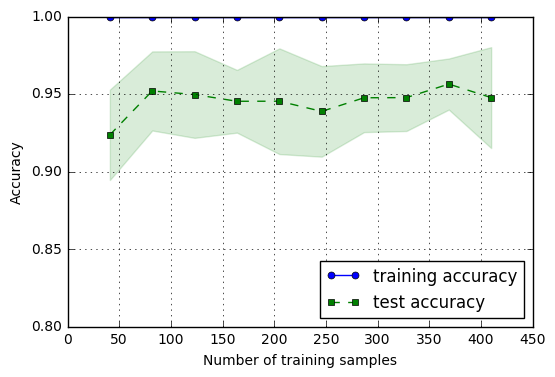

In [6]:
##decision tree
print("decision_tree:");
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
decision_T = DecisionTreeClassifier(random_state=42)
print("train_acc:",np.mean(cross_val_score(decision_T,X_train,y_train, cv=10)))
decision_T.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print("test_acc:",accuracy_score(y_test, decision_T.predict(X_test)))
plot_curve(decision_T,X_train,y_train)

svm：
train_acc: 0.9956236323851203
test_acc: 0.9646017699115044


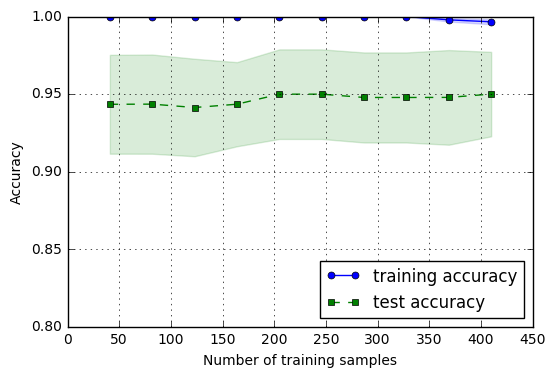

In [7]:
##svm
print("svm：")
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train,y_train)
print("train_acc:",sum(y_train == svc_clf.predict(X_train))/len(y_train))
print("test_acc:",sum(y_test == svc_clf.predict(X_test))/len(y_test))
plot_curve(svc_clf,X_train,y_train)

NN:
train_acc: 0.9629386370644465
test_acc: 0.9557522123893806


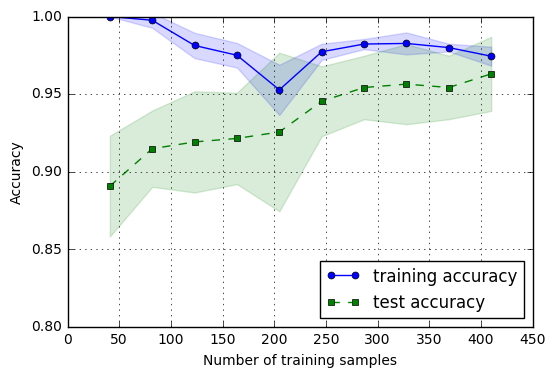

In [8]:
#NN
print("NN:")
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu', solver='adam', alpha=0.0001)
nn_model.fit(X_train,y_train);
print("train_acc:",np.mean(cross_val_score(nn_model,X_train,y_train, cv=10)))
print("test_acc:",accuracy_score(y_test, nn_model.predict(X_test)))
plot_curve(nn_model,X_train,y_train)